In [1]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
import cv2
import glob

batch_size = 30
num_epochs = 10 
kernel_size = 7 # baslangic icin n3x3, her epoch da 2ser artacak. Bir sinirin ustune cikince basariyi hic artirmiyor tikaniyor
pool_size = 2 # 2x2 eger cok buyuk olursa resmin pikselleri anlam kaybeder
conv_depth_1 = 32 # 
conv_depth_2 = 64 # 
drop_prob_1 = 0.2 # bagnazligin olusmasini engelliyor
drop_prob_2 = 0.4 # 
hidden_size = 1024 # bagli olan gizli etken sayisi, ne cok ne az olmasi gerek
w,h = 100,100

C:\Users\MY HOME\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train = []
y_train = []


X_test = []
y_test = []

i = 0
for filename in glob.glob('Normal/*.png'): #assuming gif
    im = cv2.imread(filename)
    im = cv2.resize(im, (w, h)) 
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    
    if(i > 400):
        X_test.append(im)
        y_test.append(0)
    else:
        X_train.append(im)
        y_train.append(0)
    i += 1
i = 0
for filename in glob.glob('Tumor/*.png'): #assuming gif
    im = cv2.imread(filename)
    im = cv2.resize(im, (w, h)) 
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    
    if(i > 400):
        X_test.append(im)
        y_test.append(1)
    else:
        X_train.append(im)
        y_train.append(1)    
    i += 1
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(np.unique(y_train).shape[0])

num_train, height, width, depth = X_train.shape #
num_test = X_test.shape[0] # 
num_classes = np.unique(y_train).shape[0] # sinif sayisi (kanser ya da degil)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalizasyon
X_test /= 255 # 

 


Y_train = np_utils.to_categorical(y_train, num_classes) # 2 -> [0, 0, 1]
Y_test = np_utils.to_categorical(y_test, num_classes) # 


2


In [3]:

 
inp = Input(shape=(height, width, depth)) # Input layer

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
kernel_size -= 2 # 5x5
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
kernel_size -= 2 # 7x7
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
kernel_size -= 2 # 9x9
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2) # anti bagnaz

# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3) # softmax RESIM!!!!

model = Model(inputs=inp, outputs=out) # Eger 0 dan insa edilecekse

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='Adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(X_train, Y_train,                 
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1)  




Train on 721 samples, validate on 81 samples
Epoch 1/10
721/721 [==============================] - 181s 251ms/step - loss: 8.7237 - acc: 0.4452 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
721/721 [==============================] - 143s 199ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
721/721 [==============================] - 149s 207ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
721/721 [==============================] - 200s 277ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
721/721 [==============================] - 226s 314ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
721/721 [==============================] - 223s 310ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
721/721 [==============================] - 206s 285ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.19

[8.059047741119308, 0.5]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimgv
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./Normal/8_6438.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(4, 4))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
img = cv2.resize(img, (w, h)) 
img = img.astype('float32')
img /= 255  

 
img = np.array([img,])
print(str(img.shape)) 

 
out2 = model.predict(img)

print(str(np.argmax(out2, axis=1))+" <-- Normal")

<Figure size 400x400 with 1 Axes>

(1, 100, 100, 3)
[1] <-- Normal


In [5]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Saved model to disk


In [6]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(X_train, Y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

Train on 721 samples, validate on 81 samples
Epoch 1/10
721/721 [==============================] - 383s 531ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
721/721 [==============================] - 415s 575ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.00008:19 - loss: 9.3127 - acc: 0. - ETA: 5:39 - loss:
Epoch 3/10
721/721 [==============================] - 335s 464ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
721/721 [==============================] - 353s 489ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
721/721 [==============================] - 334s 463ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
721/721 [==============================] - 321s 445ms/step - loss: 8.9644 - acc: 0.4438 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
721/721 [==============================] - 332s 460ms/s

[8.059047741119308, 0.5]

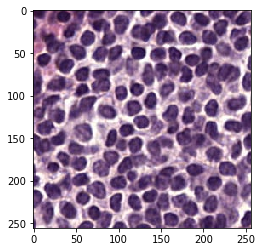

(1, 100, 100, 3)
[1] <-- Normal


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimgv
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./normal.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(4, 4))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
img = cv2.resize(img, (w, h)) 
img = img.astype('float32')
img /= 255  

 
img = np.array([img,])
print(str(img.shape)) 

 
out2 = model.predict(img)

print(str(np.argmax(out2, axis=1))+" <-- Normal")

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimgv
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./normal.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (w, h)) 
img = img.astype('float32')
img /= 255  

 
img = np.array([img,])
print(str(img.shape)) 

prediction = model.predict(img)
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])
out2 = model.predict(img)

print(str(out2))

(1, 100, 100, 3)
Prediction Score:
 [0. 1.]

Thresholded Score:
 [0 1]

Predicted Digit:
 1
[[0. 1.]]


In [31]:
for layer in model.layers:
    weights = layer.get_weights()
print(weights)

[array([[ 0.02012804,  0.02698491],
       [ 0.03607704, -0.02347718],
       [-0.01864431, -0.0406785 ],
       ...,
       [-0.05652086, -0.07661889],
       [-0.02317744, -0.01514062],
       [-0.0071745 ,  0.05422686]], dtype=float32), array([-0.00598158,  0.00598158], dtype=float32)]


In [32]:
print(X_train.shape)

(802, 100, 100, 3)


In [33]:
print(Y_train.shape)

(802, 2)


In [34]:
print(X_test.shape)

(198, 100, 100, 3)


In [35]:
print(Y_test.shape)

(198, 2)
